# Airline Data Problem

## 1. Hierarchical clustering

### Import Libraries and installing packages for .xlsx

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import os

In [4]:
pip install xlrd

     |████████████████████████████████| 96 kB 178 kB/s eta 0:00:01
You should consider upgrading via the '/home/prathikm/miniconda3/envs/ds/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl

     |████████████████████████████████| 243 kB 480 kB/s eta 0:00:01
You should consider upgrading via the '/home/prathikm/miniconda3/envs/ds/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Doing EDA on the dataset

In [6]:
os.chdir("/home/prathikm/Desktop/ds_assignments/doing/clustering")
df = pd.read_excel("EastWestAirlines.xlsx") #import universities dataset
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
df.info() #no non-null values, identify the datatypes, range etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Dropping ID column - no significance

In [9]:
df_1 = df.drop(['ID#'],axis=1)
df_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Normalization of the data

In [10]:
#Defining the normalization function
def normalf(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [13]:
#normalize the dataframe
df_normal = normalf(df_1.iloc[:,:])
df_normal

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Dendrogram

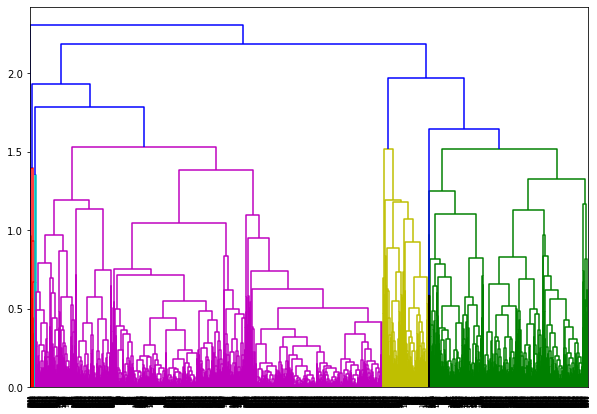

In [15]:
#Plotting the dendrogram - COMPLETE METHOD
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_normal,method='complete'))

# Fit and Predict

In [16]:
#specifying hierarchical clustering, clusters as 3
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [17]:
#prediction - there is no centroid in agglomerative options
y_hc = hc.fit_predict(df_normal)
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [25]:
#5 clusters are formed.
#creating new dataframe column as clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
df['h_clusterid'] = Clusters

# No.of clusters formed

In [26]:
df['h_clusterid'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: h_clusterid, dtype: int64

In [27]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [29]:
#grouping the customers as per clusters
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2169.576353,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,2302.967742,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


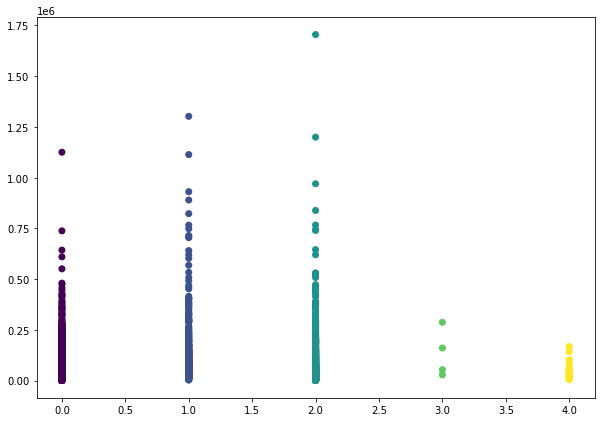

In [31]:
#plotting the clusters based on the balance
plt.figure(figsize=(10, 7))  
plt.scatter(df['h_clusterid'],df['Balance'], c=hc.labels_)